# Axion-electron coupling limits vs axion mass

Axion mass-PQ scale relation:
\begin{equation}
m_{a}=5.70(7) \mu \mathrm{eV}\left(\frac{10^{12} \,\mathrm{GeV}}{f_{a}}\right)
\end{equation}

Axion-electron coupling
\begin{equation}
g_{ae} \equiv \frac{C_{ae} m_{e}}{f_{a}}=8.943 \times 10^{-11} C_{ae}\frac{m_a}{\mathrm{eV}}
\end{equation}

Model dependent constant:
\begin{equation}
C_{ae}  = 
\begin{cases}
  2\times 10^{-4} & {\rm KSVZ} \\
  [0.024,\frac{1}{3}] & {\rm DFSZ\,I} \\
  [-\frac{1}{3},0] & {\rm DFSZ\,II}
\end{cases}
\end{equation}
In DFSZ the lepton mass can come from either coupling to $H_u$ or $H_d$, so $C_{ae} = -C_{au}$ or $C_{ad}$. The range of values for DFSZ I and II come from the perturbativity of the Yukawa couplings with sets the range $0.28<v_{u} / v_{d}<140$ for the Higgs vevs.

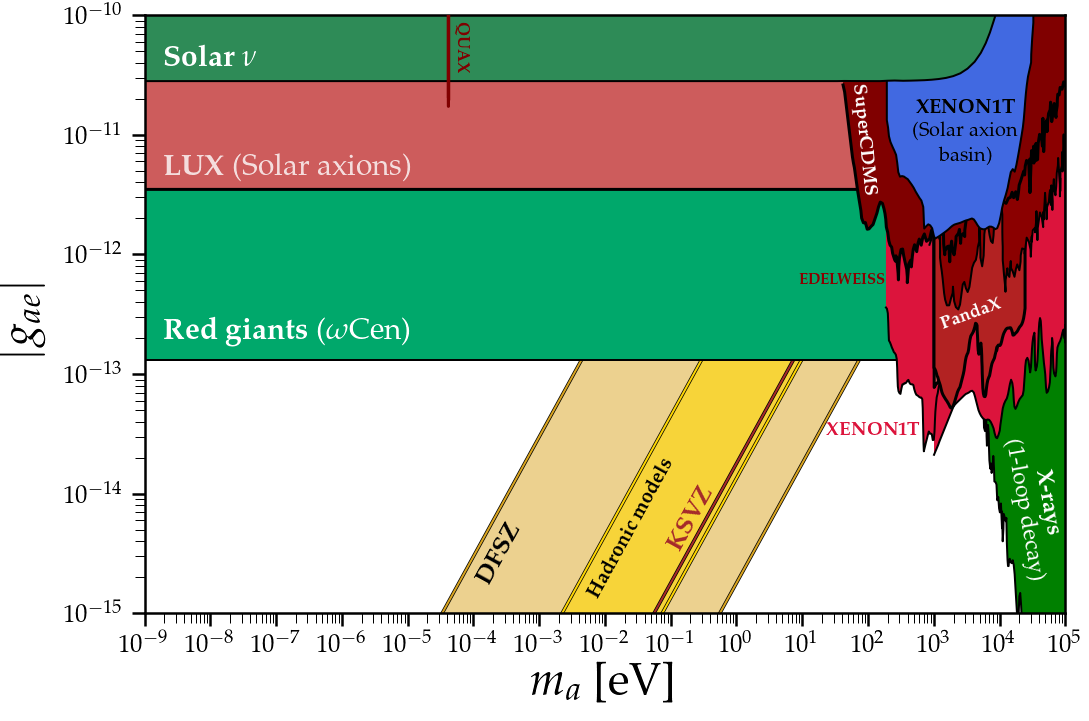

In [1]:
%matplotlib inline
from numpy import loadtxt
import matplotlib.pyplot as plt
from PlotFuncs import FigSetup,BlackHoleSpins,AxionElectron, MySaveFig

fig,ax = FigSetup(Shape='Rectangular',ylab=r'$|g_{ae}|$',mathpazo=True,\
                  g_min=1e-15,g_max=1e-10,m_min=1e-9,m_max=1e5,xtick_rotation=0)

AxionElectron.QCDAxion(ax)
AxionElectron.LUX(ax)
AxionElectron.PandaX(ax)
AxionElectron.XENON1T(ax)
AxionElectron.SolarBasin(ax)
AxionElectron.SuperCDMS(ax)
AxionElectron.EDELWEISS(ax)
AxionElectron.RedGiants(ax)
AxionElectron.SolarNu(ax)
AxionElectron.QUAX(ax)
AxionElectron.Xrays(ax)
    
MySaveFig(fig,'AxionElectron')

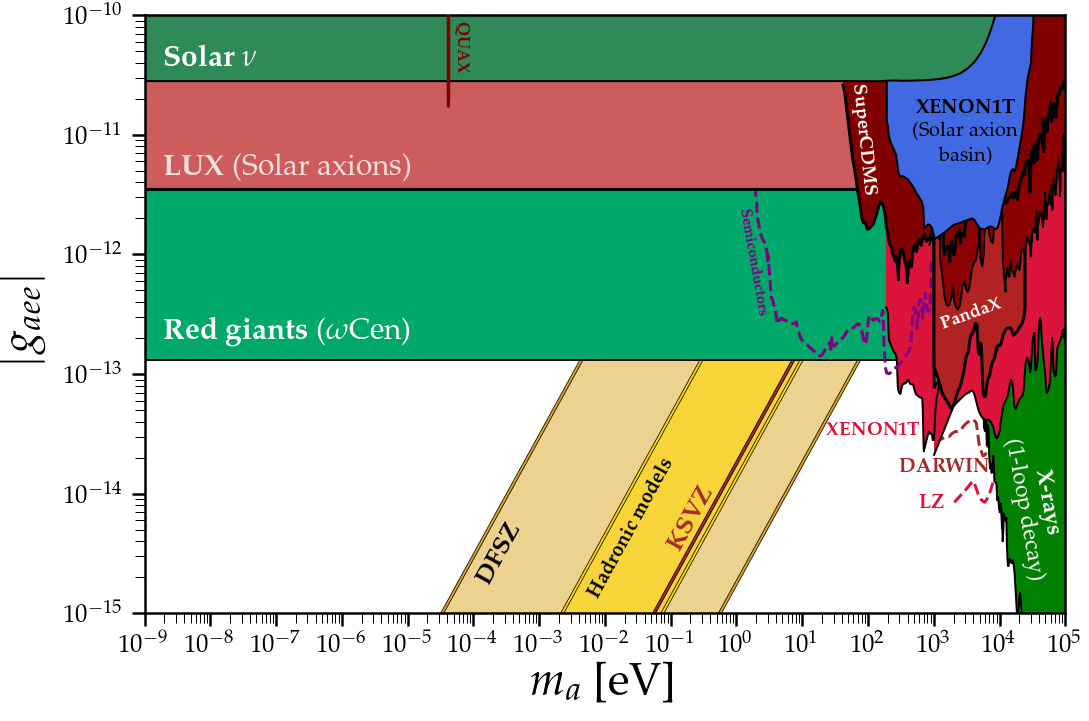

In [4]:
fig,ax = FigSetup(Shape='Rectangular',ylab=r'$|g_{aee}|$',mathpazo=True,\
                  g_min=1e-15,g_max=1e-10,m_min=1e-9,m_max=1e5,xtick_rotation=0)

AxionElectron.QCDAxion(ax)
AxionElectron.LUX(ax)
AxionElectron.PandaX(ax)
AxionElectron.XENON1T(ax)
AxionElectron.SolarBasin(ax)
AxionElectron.SuperCDMS(ax)
AxionElectron.EDELWEISS(ax,text_on=False)
AxionElectron.RedGiants(ax)
AxionElectron.SolarNu(ax)
AxionElectron.QUAX(ax)
AxionElectron.DARWIN(ax)
AxionElectron.LZ(ax,text_pos=[0.6e3,1e-14],rotation=0,rotation_mode='anchor')
AxionElectron.Semiconductors(ax)       
#AxionElectron.Magnon(ax)
#AxionElectron.MagnonScan(ax)

AxionElectron.Xrays(ax)


MySaveFig(fig,'AxionElectron_with_Projections')




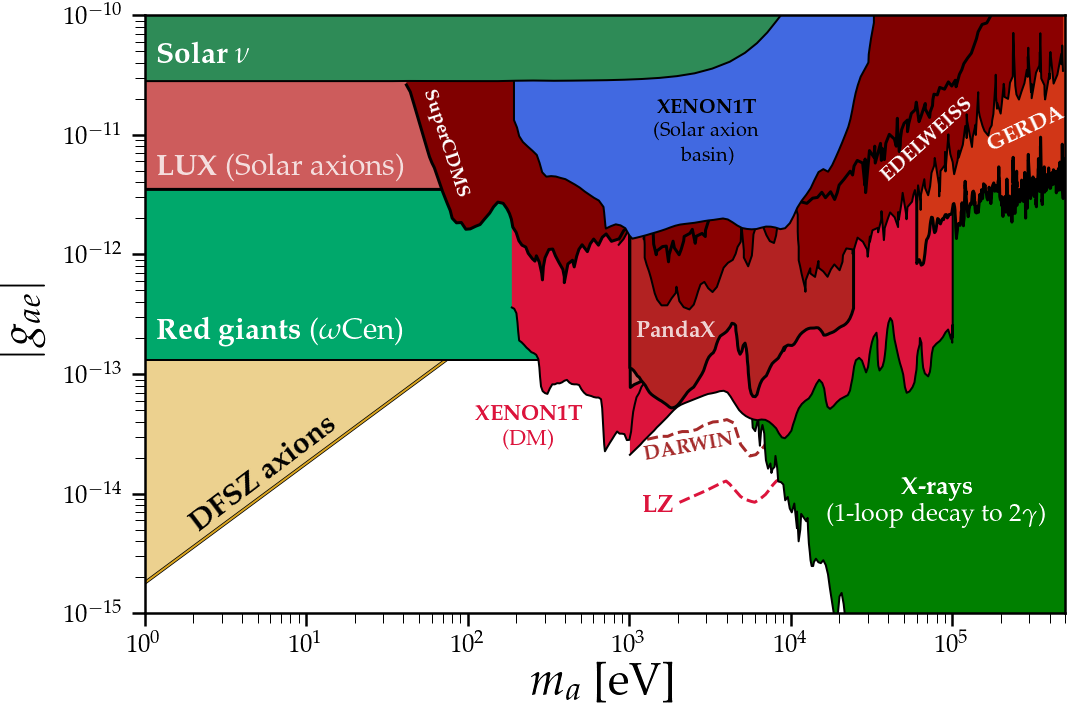

In [12]:
fig,ax = FigSetup(Shape='Rectangular',ylab=r'$|g_{ae}|$',mathpazo=True,\
                  g_min=1e-15,g_max=1e-10,m_min=1e0,m_max=5e5,xtick_rotation=0,tfs=25)

AxionElectron.QCDAxion(ax,DFSZ_on=True,KSVZ_on=False,Hadronic_on=False)

plt.gcf().text(0.16,0.23,r'{\bf DFSZ axions}',fontsize=30,rotation=37,alpha=1)

AxionElectron.LUX(ax,text_pos=[1.2e0,7e-12])
AxionElectron.PandaX(ax,fs=25,text_pos=[1.1e3,2.8e-13],rotation=0,alpha=0.8,rotation_mode='anchor')
AxionElectron.XENON1T(ax,text_shift=[2,1.4],fs=22)
AxionElectron.SolarBasin(ax)
AxionElectron.SuperCDMS(ax,text_pos=[5e1,2.5e-11],rotation=-72)
AxionElectron.EDELWEISS(ax,text_pos=[3.5e4,2.2e-11],fs=20,rotation=42,text_col='w')
AxionElectron.RedGiants(ax,text_pos=[1.2e0,2e-13])
AxionElectron.SolarNu(ax,text_pos=[1.2e0,4e-11])
AxionElectron.GERDA(ax,rotation=25)
AxionElectron.DARWIN(ax,text_pos=[1.2e3,2.5e-14],rotation=10,rotation_mode='anchor')
AxionElectron.LZ(ax,fs=25,text_pos=[1.2e3,1e-14],rotation=0,rotation_mode='anchor')

AxionElectron.Xrays(ax,text_on=False)
plt.text(8e4,1e-14,r'{\bf X-rays}',fontsize=25,color='w',ha='center')
plt.text(8e4,0.6e-14,r'(1-loop decay to 2$\gamma$)',fontsize=25,color='w',ha='center')


MySaveFig(fig,'AxionElectron_UndergroundDetectorsCloseup')

